# Importing Neccessary Libraries

In [155]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score

### Loading the dataset

In [156]:
data = pd.read_csv("data.csv")
data.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


### Shape of Data Before Preprocessing

In [157]:
data.shape

(4600, 18)

### Checking for Null Values

In [158]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### Droping columns that seems unimportant for predicting price of a house

In [159]:
df = data.drop(['date', 'waterfront', 'view', 'sqft_basement', 'yr_renovated','sqft_lot', 'sqft_above', 'street', 'country'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,yr_built,city,statezip
0,313000.0,3.0,1.50,1340,1.5,3,1955,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,2.0,5,1921,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,1.0,4,1966,Kent,WA 98042
3,420000.0,3.0,2.25,2000,1.0,4,1963,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,1.0,4,1976,Redmond,WA 98052


### Shape of Data After Removing Un-neccessary columns

In [160]:
df.shape

(4600, 9)

## Pre_Processing Starts Here

In [161]:
#Removing all the rows where price is eaquals to '0'
df = df[df['price'] != 0]

- Checking and Removing Outliers from **'Price'** Column

In [162]:

# Calculate IQR for price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count number of outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Number of outliers in 'price': {len(outliers)}")

# Remove outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Check new shape
print("After removing outliers:", df.shape)

Number of outliers in 'price': 240
After removing outliers: (4311, 9)


- Converting Less numbers of bedrooms like` 8.0 and 9.0 which contains only 1` value into Bigger value

In [163]:
df = df[df['bedrooms'] != 0]
df['bedrooms'] = df['bedrooms'].apply(lambda x: 7 if x > 7 else x)
print(df['bedrooms'].value_counts())

bedrooms
3.0    1981
4.0    1394
2.0     557
5.0     282
6.0      47
1.0      37
7.0      12
Name: count, dtype: int64


- Similarily did with `bathrooms` column

In [164]:
bathroom_counts = df['bathrooms'].value_counts()
rare_bathrooms = bathroom_counts[bathroom_counts <= 5].index
df['bathrooms'] = df['bathrooms'].apply(lambda x: 6 if x in rare_bathrooms else x)
df['bathrooms'].value_counts()

bathrooms
2.50    1144
1.00     735
1.75     619
2.00     420
2.25     397
1.50     284
2.75     256
3.00     145
3.50     118
3.25     102
3.75      25
0.75      17
4.00      15
4.50      12
6.00      11
4.25      10
Name: count, dtype: int64

- Checking and Removing outliers from **sqft_living** living column

In [165]:
Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['sqft_living'] < lower_bound) | (df['sqft_living'] > upper_bound)]
print(f"Number of outliers in sqft_living: {len(outliers)}")
print(outliers[['sqft_living']].head())

#Removing 
df = df[(df['sqft_living'] >= lower_bound) & (df['sqft_living'] <= upper_bound)]

#New shape after Remving outliers
print("After removing outliers:", df.shape)

Number of outliers in sqft_living: 73
     sqft_living
107         4340
143         4420
148         4490
233         4460
388         4230
After removing outliers: (4237, 9)


- 3.5 had only one value in **floors** column so i removed it.

In [166]:
df = df[df['floors'] != 3.5]
df['floors'].value_counts()

floors
1.0    2097
2.0    1583
1.5     413
3.0     119
2.5      24
Name: count, dtype: int64

In [167]:
df['condition'].value_counts()

condition
3    2648
4    1170
5     382
2      30
1       6
Name: count, dtype: int64

- As i did earlier in `bathrooms` and `bedrooms` columns, in **condition** column, Values with less converted into higher numbers.

In [168]:
count_condition = df['condition'].value_counts()
rare_condition = count_condition[count_condition <= 30].index
df['condition'] = df['condition'].apply(lambda x: 5 if x in rare_condition else x)
df['condition'].value_counts()

condition
3    2648
4    1170
5     418
Name: count, dtype: int64

- Made a new column **House_Age** to see how many years old it is.

In [169]:
df['House_Age'] = 2025 - df['yr_built']

- Cities having `less than 10 converted` into **other**

In [170]:
city_counts = df['city'].value_counts()
cities_less_than_ten = city_counts[city_counts <= 10].index
df['city'] = df['city'].apply(lambda x: 'other' if x in cities_less_than_ten else x)



- Removed State of **zip_code** because everyone was same and Converted dtype of **zip_code** into `int64` from object

In [171]:
df['city_code'] = df['statezip'].apply(lambda x:x.split(' ')[1])
df['city_code'] = df['city_code'].apply(lambda x : int(x))
df['city_code'].head()

0    98133
2    98042
3    98008
4    98052
5    98115
Name: city_code, dtype: int64

- Droping two columns because `they've been converted` into **same others and more meaningful**

In [172]:
df1 = df.drop(columns=['yr_built', 'statezip'])


## Final Data ready for ML

In [173]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,city,House_Age,city_code
0,313000.0,3.0,1.50,1340,1.5,3,Shoreline,70,98133
2,342000.0,3.0,2.00,1930,1.0,4,Kent,59,98042
3,420000.0,3.0,2.25,2000,1.0,4,Bellevue,62,98008
4,550000.0,4.0,2.50,1940,1.0,4,Redmond,49,98052
5,490000.0,2.0,1.00,880,1.0,3,Seattle,87,98115


- Shape of Data After Preprocessing

In [174]:
df1.shape

(4236, 9)

- Checking for null values

In [175]:
df1.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
condition      0
city           0
House_Age      0
city_code      0
dtype: int64

- Info of Data

In [176]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4236 entries, 0 to 4599
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        4236 non-null   float64
 1   bedrooms     4236 non-null   float64
 2   bathrooms    4236 non-null   float64
 3   sqft_living  4236 non-null   int64  
 4   floors       4236 non-null   float64
 5   condition    4236 non-null   int64  
 6   city         4236 non-null   object 
 7   House_Age    4236 non-null   int64  
 8   city_code    4236 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 330.9+ KB


- Statistical Analysis

In [177]:
df1.describe()

,price,bedrooms,bathrooms,sqft_living,floors,condition,House_Age,city_code
count,4.236000e+03,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000
mean,4.811796e+05,3.334278,2.075956,1985.183192,1.487134,3.473560,54.466714,98080.228754
std,2.102579e+05,0.866627,0.704786,734.356035,0.534754,0.668403,29.543446,52.958899
min,7.800000e+03,1.000000,0.750000,370.000000,1.000000,3.000000,11.000000,98001.000000
25%,3.170000e+05,3.000000,1.750000,1420.000000,1.000000,3.000000,29.000000,98034.000000
50%,4.450000e+05,3.000000,2.250000,1900.000000,1.500000,3.000000,50.000000,98072.000000
75%,6.050000e+05,4.000000,2.500000,2470.000000,2.000000,4.000000,74.000000,98118.000000
max,1.150000e+06,7.000000,6.000000,4130.000000,3.000000,5.000000,125.000000,98354.000000


In [178]:
df1['price'].agg(['min','max'])

min       7800.0
max    1150000.0
Name: price, dtype: float64

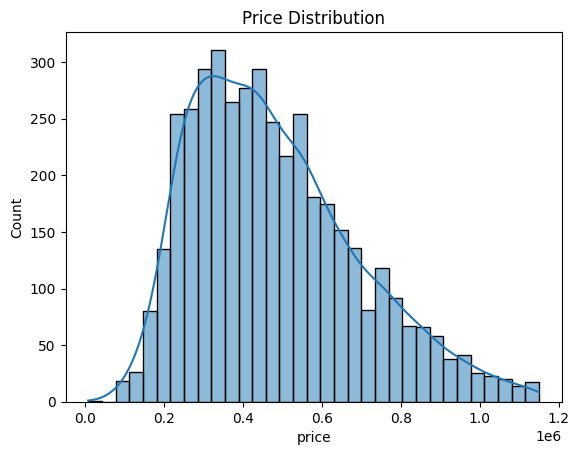

In [179]:

sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()


## Machine_Learning Starts from here:

- Spliting Features and Label 

In [180]:
X = df1.drop('price', axis=1)
y = df1['price']

- Columns in X

In [181]:
pd.set_option('display.width', 1000)
print(X.head())

   bedrooms  bathrooms  sqft_living  floors  condition       city  House_Age  city_code
0       3.0       1.50         1340     1.5          3  Shoreline         70      98133
2       3.0       2.00         1930     1.0          4       Kent         59      98042
3       3.0       2.25         2000     1.0          4   Bellevue         62      98008
4       4.0       2.50         1940     1.0          4    Redmond         49      98052
5       2.0       1.00          880     1.0          3    Seattle         87      98115


- Split the data into **Train_Test**

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
numerical_features = [col for col in X.columns if X[col].dtypes in ['int64', 'float64']]
categorical_features = [col for col in X.columns if X[col].dtypes in ['object', 'category']]

print("Numerical:", numerical_features)
print("Categorical:", categorical_features)


Numerical: ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'House_Age', 'city_code']
Categorical: ['city']


- Pre_processing

In [184]:
preprocessing = ColumnTransformer([
    ('num' , StandardScaler() , numerical_features),
    ('cate' , OneHotEncoder() , categorical_features)
])

- PipeLine

In [185]:
pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('model', LinearRegression())
])

In [186]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

In [187]:
print('r2_score', r2_score(y_test,y_pred))

r2_score 0.7000180824569485


In [188]:
import joblib

# Save the trained pipeline
joblib.dump(pipeline, 'house_price_model.pkl')
print("✅ Model saved successfully!")


✅ Model saved successfully!
